# Q. 다음 분기에 어떤 게임을 설계해야 할까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/vgames2.csv", index_col=0)
data.head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


# 전처리
1. 결측값
  - 결측값을 어떻게 보간할 것인가
  - 연도의 9, 15... 이상치 보정 필요
    - 9 이하 -> 앞에 200 붙이기
    - 10 이상 22 이하 -> 앞에 20 붙이기
    - 22 이상 -> 앞에 19 붙이기
2. 출고량의 M/K 해석 -> 단위 맞추기

## 1. 결측값 처리
- year : 두자리 숫자 데이터 -> 네자리로 만들기 & n/a 결측치 dropna()
- genre : 공백 결측치 dropna()
- publisher : n/a 결측치 dropna()
  - 공백, n/a 결측치는 데이터가 없어 그 자체로 분석/해석이 불가능하기 때문에 제거
  - 연도의 두자리 데이터는 총 100개 -> 무시하지 못함. 결과 해석에 필요하기 때문에 네자리 연도로 바꾸주는 작업 필요!
- 작업 순서 ❗
  - 1. year 변수 네자릿수로 변환
  - 2. 공백, n/a 결측값 dropna()로 제거

In [4]:
# 결측치 확인
data.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

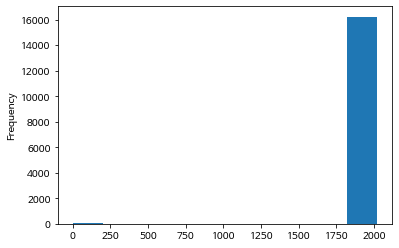

In [5]:
# year
data['Year'].plot.hist()

- 0~250 사이에 데이터가 존재함을 확인! 연도는 네자릿수가 되어야 하므로 변환 작업 필요

In [6]:
# year 변수에 한자릿수, 두자릿수 데이터 확인
data['Year'].value_counts(ascending=True).head(20)

94.0      1
2020.0    1
86.0      1
1.0       2
12.0      2
14.0      2
97.0      2
13.0      2
2.0       3
96.0      3
98.0      3
7.0       3
2017.0    3
0.0       3
95.0      4
4.0       4
5.0       4
15.0      5
16.0      5
6.0       7
Name: Year, dtype: int64

In [7]:
# 연도 변수 변환 (두자릿수 -> 네자릿수) 함수 작성
def Change_Year(year):
  if year < 10:
    year = pd.to_numeric("200" + str(year))
  elif year >= 10 and year < 22 :
    year = pd.to_numeric("20" + str(year))
  elif year >= 22 and year <= 100:
    year = pd.to_numeric("19" + str(year))
  return year

In [8]:
# 함수 적용
data['Year'] = data['Year'].apply(Change_Year)

In [9]:
# 바뀐값 확인_1
data['Year'].value_counts(ascending=True)

2020.0       1
2017.0       3
1980.0       9
1984.0      14
1985.0      14
1988.0      15
1990.0      16
1987.0      16
1983.0      17
1989.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2016.0     344
2000.0     349
1998.0     379
2001.0     482
2013.0     546
2014.0     582
2015.0     614
2012.0     657
2004.0     763
2003.0     775
2002.0     829
2005.0     941
2006.0    1008
2011.0    1139
2007.0    1202
2010.0    1259
2008.0    1428
2009.0    1431
Name: Year, dtype: int64

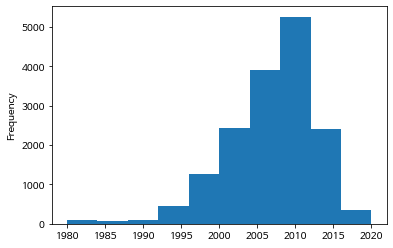

In [10]:
# 바뀐값 확인
data.Year.plot.hist()

- 변환 전과 달리 0~250 사이의 데이터가 모두 네자릿수 데이터로 변환된 것을 확인할 수 있다.

In [11]:
# n/a, 공백값 제거
data = data.dropna()

# 소수점 지우고 정수형으로 변환
data['Year'] = data['Year'].astype(int)

In [12]:
# 결측치 확인
data.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

- 결측치가 모두 변환, 제거된 것을 확인!

## 2. 출고량의 M/K 해석 -> 단위 맞추기

In [13]:
# 전처리_형변환 (milion 단위로 맞추기)

# 단위 변환 함수 작성
def to_numeric(data):
  if data[-1] == 'K':
    data = pd.to_numeric(data.replace('K','')) * 0.001
  elif data[-1] == 'M':
    data = pd.to_numeric(data.replace('M',''))
  else :
    data = pd.to_numeric(data)
  return data

In [14]:
# 함수 적용
data['NA_Sales'] = data['NA_Sales'].apply(to_numeric)
data['EU_Sales'] = data['EU_Sales'].apply(to_numeric)
data['JP_Sales'] = data['JP_Sales'].apply(to_numeric)
data['Other_Sales'] = data['Other_Sales'].apply(to_numeric)

In [15]:
# 전처리 후 형변환 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [16]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234
std,5.832087,0.822431,0.508340,0.309272,0.189678
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


- 단위가 비슷하게 맞춰진 것을 확인할 수 있다

___

# Q1. 지역에 따라서 선호하는 게임 장르가 다를까
**추가) 지역별 출고량 총계 구해서 파이플랏으로 시각화** ❗
- 지역별로 게임 출고량이 계산 -> 간접적인 시장점유율 -> 더 중요한 타겟 시장 선정!

In [17]:
# 누적 출고량 계산
Total_NA_Sales = data['NA_Sales'].sum()
Total_EU_Sales = data['EU_Sales'].sum()
Total_JP_Sales = data['JP_Sales'].sum()
Total_Other_Sales = data['Other_Sales'].sum()
print("북미 지역의 누적 출고량 :", Total_NA_Sales, "M")
print("유럽 지역의 누적 출고량 :", Total_EU_Sales, "M")
print("일본 지역의 누적 출고량 :", round(Total_JP_Sales, 2), "M")
print("기타 지역의 누적 출고량 :", round(Total_Other_Sales, 2), "M")

북미 지역의 누적 출고량 : 4307.04 M
유럽 지역의 누적 출고량 : 2393.57 M
일본 지역의 누적 출고량 : 1271.39 M
기타 지역의 누적 출고량 : 783.37 M


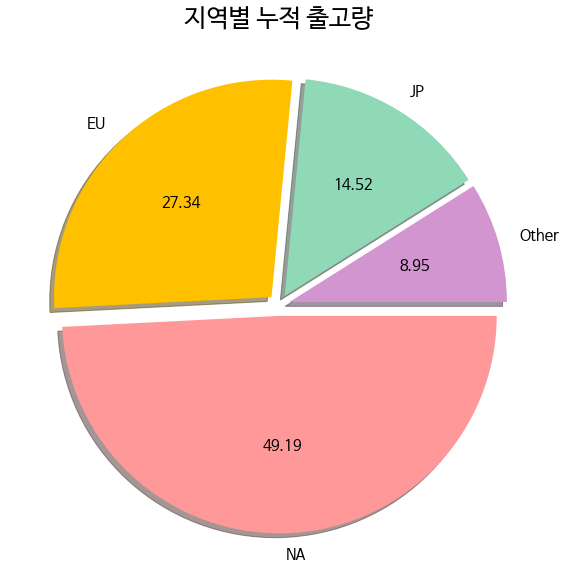

In [18]:
# 누적 출고량으로 확인한 시장 점유율
plt.figure(figsize=(15,10))
Sales = [Total_NA_Sales, Total_EU_Sales, Total_JP_Sales, Total_Other_Sales]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
explode = [0.05, 0.05, 0.05, 0.05]
label = ['NA', 'EU', 'JP', 'Other'] 
 
plt.pie(Sales, autopct = '%.2f', labels = label, shadow=True, colors=colors, counterclock=False, explode = explode, textprops={'size': 15})
plt.title("지역별 누적 출고량", fontsize=25)
plt.show()

- 북미 지역의 높은 시장 점유율 -> 타겟 대상!
___

In [20]:
data2 = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [21]:
data3 = data2[['Genre','NA_Sales']]
data4 = data2[['Genre','EU_Sales']]
data5 = data2[['Genre','JP_Sales']]
data6 = data2[['Genre','Other_Sales']]

In [22]:
NA_Sales_sum = data3.groupby('Genre').sum()
EU_Sales_sum = data4.groupby('Genre').sum()
JP_Sales_sum = data5.groupby('Genre').sum()
Other_Sales_sum = data6.groupby('Genre').sum()

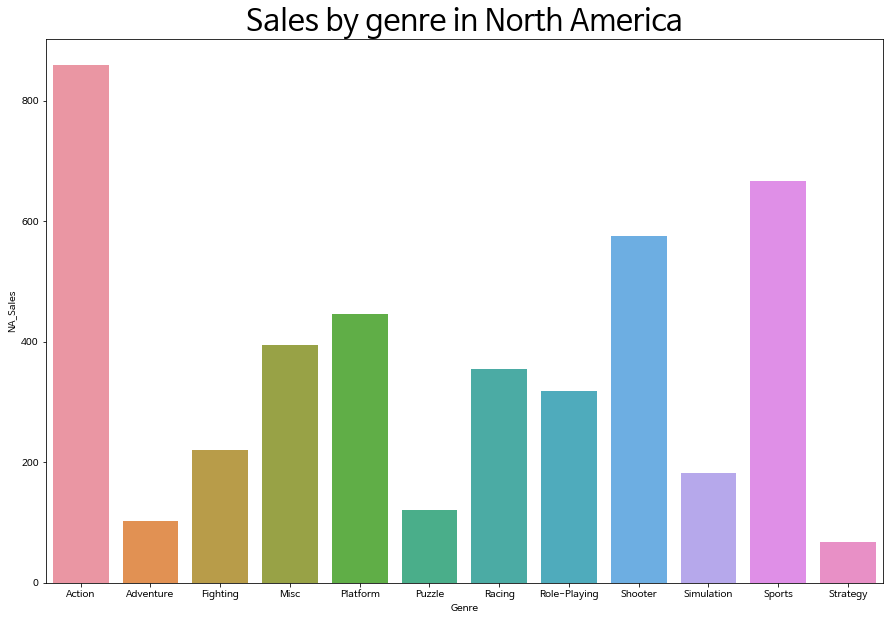

In [23]:
# 북미 지역의 장르에 따른 게임 출고량
plt.figure(figsize=(15,10))
plt.title('Sales by genre in North America', fontsize=30)
sns.barplot(NA_Sales_sum.index, NA_Sales_sum['NA_Sales'])

- 북미 지역의 장르별 게임 출고량의 총합을 그래프로 시각화
- **북미 지역에서는 액션 장르와 스포츠, shooter(슈팅) 장르가 선호됨을 알 수 있다.**

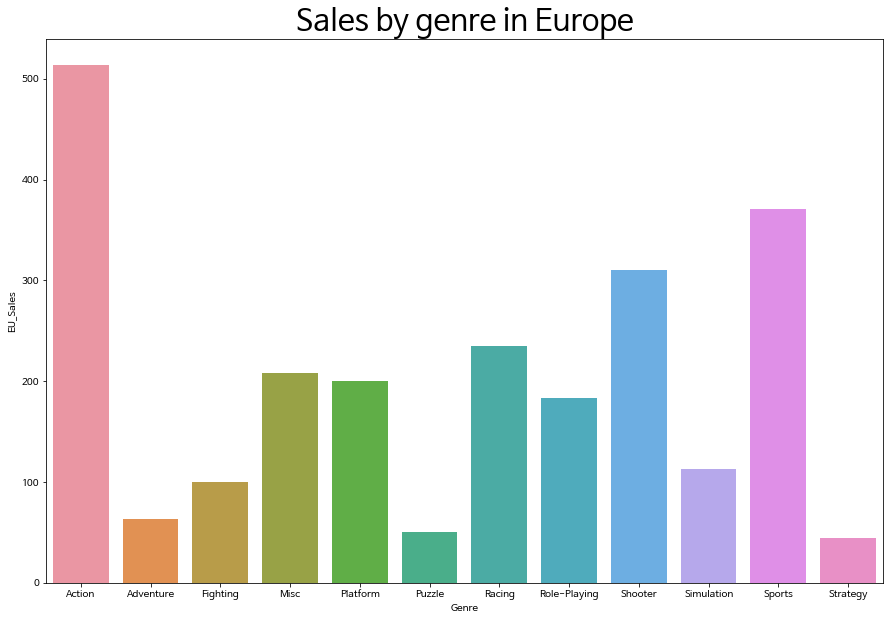

In [24]:
# 유럽 지역의 장르에 따른 게임 출고량
plt.figure(figsize=(15,10))
plt.title('Sales by genre in Europe', fontsize=30)
sns.barplot(EU_Sales_sum.index, EU_Sales_sum['EU_Sales'])

- 유럽 지역의 장르별 게임 출고량의 총합을 그래프로 시각화
- **유럽 지역에서는 북미 지역과 비슷한 형태를 보인다. 액션 장르와 스포츠, shooter(슈팅) 장르가 선호됨을 알 수 있다.**

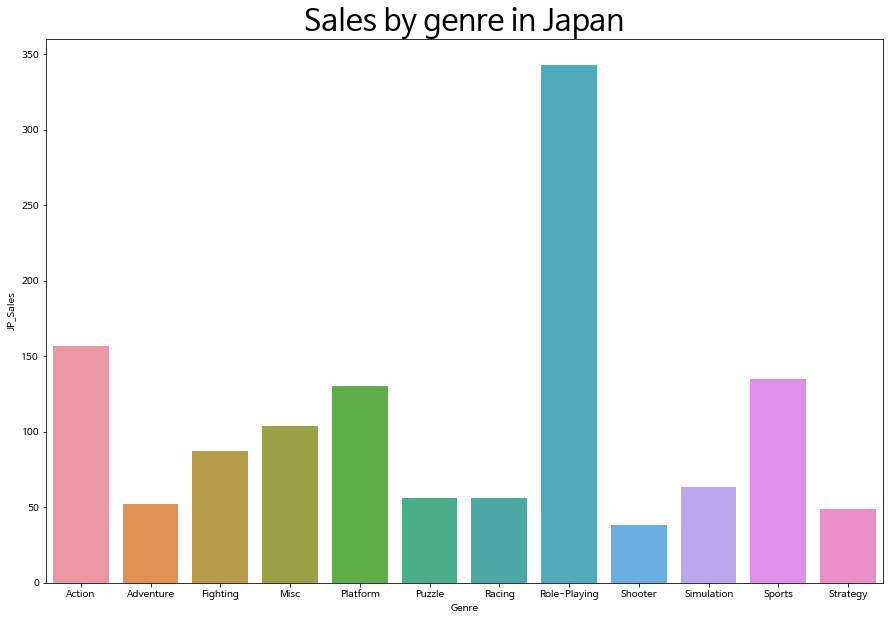

In [25]:
# 일본 지역의 장르에 따른 게임 출고량
plt.figure(figsize=(15,10))
plt.title('Sales by genre in Japan', fontsize=30)
sns.barplot(JP_Sales_sum.index, JP_Sales_sum['JP_Sales'])

- 일본 지역의 장르별 게임 출고량의 총합을 그래프로 시각화
- **일본 지역에서는 Role-Playing 장르가 가장 선호되며, 그 다음으로는 액션과 스포츠, platform 장르가 선호됨을 알 수 있다.**

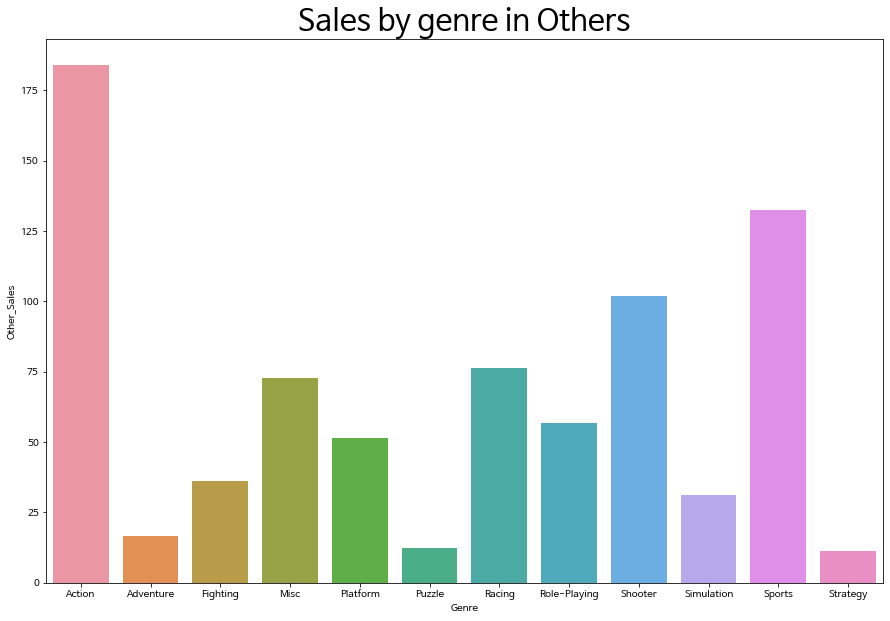

In [26]:
# 기타 지역의 장르에 따른 게임 출고량
plt.figure(figsize=(15,10))
plt.title('Sales by genre in Others', fontsize=30)
sns.barplot(Other_Sales_sum.index, Other_Sales_sum['Other_Sales'])

- **북미, 유럽 지역과 비슷한 형태를 보인다. 액션, 스포츠, 슈팅 장르에서 높은 선호도를 보임**

## 그래프 한 눈에 보이도록

In [27]:
merge1 = pd.merge(NA_Sales_sum, EU_Sales_sum, on='Genre')
merge2 = pd.merge(JP_Sales_sum, Other_Sales_sum, on='Genre')
merge_all = pd.merge(merge1, merge2, on='Genre')
merge_all

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


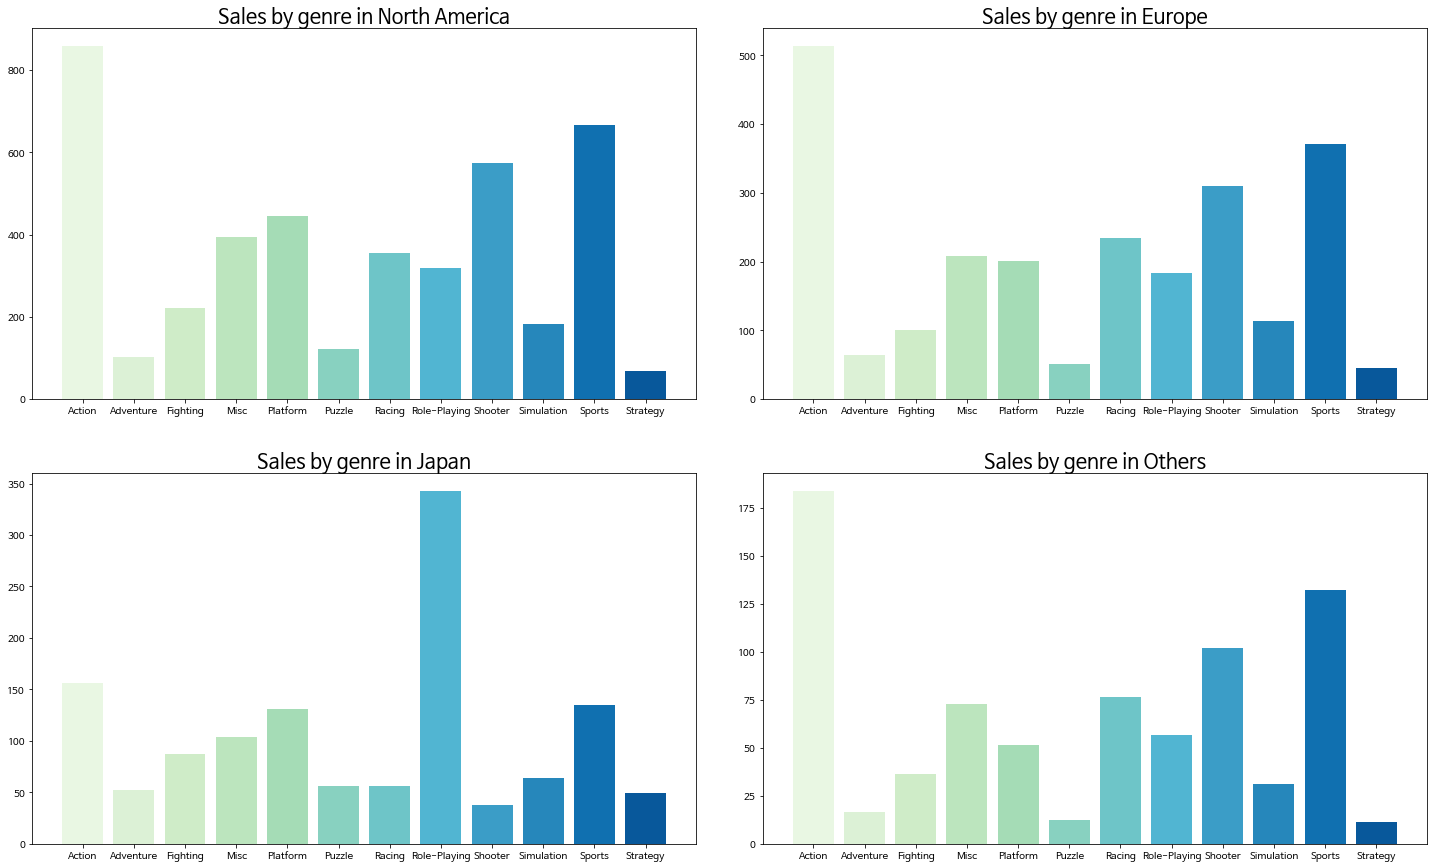

In [28]:
# 격자 생성
f, axes = plt.subplots(2,2)
# 격자 크기 설정
f.set_size_inches((25, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.1, hspace = 0.2)
# 색상 지정
colors = sns.color_palette('GnBu',len(merge_all))

# NA_Sales_sum
axes[0, 0].bar(NA_Sales_sum.index, NA_Sales_sum['NA_Sales'], color=colors)
axes[0, 0].set_title('Sales by genre in North America', fontsize = 20)

# EU_Sales_sum
axes[0, 1].bar(EU_Sales_sum.index, EU_Sales_sum['EU_Sales'], color=colors)
axes[0, 1].set_title('Sales by genre in Europe', fontsize = 20)

# JP_Sales_sum
axes[1, 0].bar(JP_Sales_sum.index, JP_Sales_sum['JP_Sales'], color=colors)
axes[1, 0].set_title('Sales by genre in Japan', fontsize = 20)

# Other_Sales_sum
axes[1, 1].bar(Other_Sales_sum.index, Other_Sales_sum['Other_Sales'], color=colors)
axes[1, 1].set_title('Sales by genre in Others', fontsize = 20)


plt.show()

# Q2. 연도별 게임의 트렌드가 있을까 (추세)

### 모든 장르에 대한 연도별 **출시량** 변화

In [29]:
data7 = data[['Year', 'Genre']]
data7

,Year,Genre
1,2008,Action
2,2009,Action
3,2010,Adventure
4,2010,Misc
5,2010,Platform
...,...,...
16594,2006,Platform
16595,2005,Action
16596,2015,Sports
16597,2013,Action


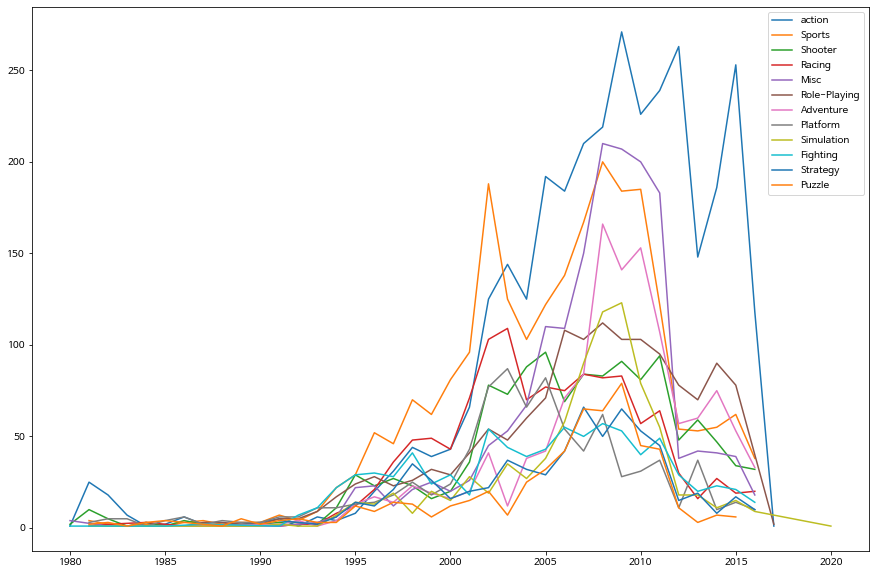

In [30]:
# 연도에 따른 장르별 게임 출시 횟수의 변화
plt.figure(figsize=(15,10))

action = data7[data7['Genre']=='Action'].groupby('Year').count()
plt.plot(action, label = 'action')

Sports = data7[data7['Genre']=='Sports'].groupby('Year').count()
plt.plot(Sports, label = 'Sports')

Shooter = data7[data7['Genre']=='Shooter'].groupby('Year').count()
plt.plot(Shooter, label = 'Shooter')

Racing = data7[data7['Genre']=='Racing'].groupby('Year').count()
plt.plot(Racing, label = 'Racing')

Misc = data7[data7['Genre']=='Misc'].groupby('Year').count()
plt.plot(Misc, label = 'Misc')

Role_Playing = data7[data7['Genre']=='Role-Playing'].groupby('Year').count()
plt.plot(Role_Playing, label = 'Role-Playing')

Adventure = data7[data7['Genre']=='Adventure'].groupby('Year').count()
plt.plot(Adventure, label = 'Adventure')

Platform = data7[data7['Genre']=='Platform'].groupby('Year').count()
plt.plot(Platform, label = 'Platform')

Simulation = data7[data7['Genre']=='Simulation'].groupby('Year').count()
plt.plot(Simulation, label = 'Simulation')

Fighting = data7[data7['Genre']=='Fighting'].groupby('Year').count()
plt.plot(Fighting, label = 'Fighting')

Strategy = data7[data7['Genre']=='Strategy'].groupby('Year').count()
plt.plot(Strategy, label = 'Strategy')

Puzzle = data7[data7['Genre']=='Puzzle'].groupby('Year').count()
plt.plot(Puzzle, label = 'Puzzle')

plt.legend()

In [31]:
data8 = data7.groupby('Year').describe()
data8.head()

Genre                    
     count unique     top freq
Year                          
1980     8      4    Misc    4
1981    46      7  Action   25
1982    36      7  Action   18
1983    17      7  Action    7
1984    14      7  Racing    3

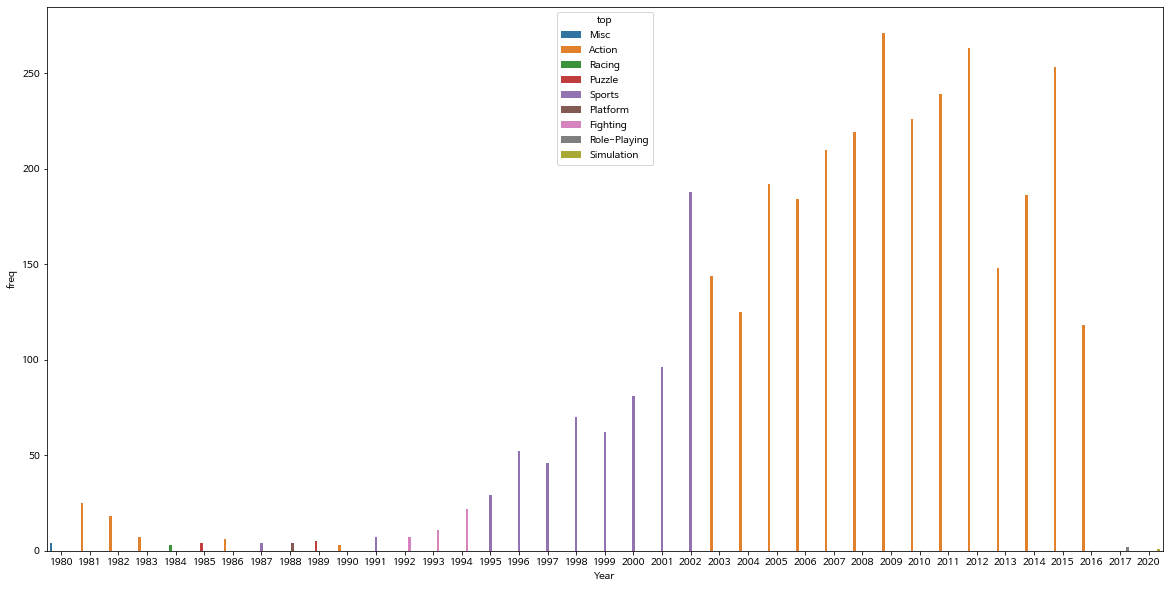

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=data8.index, y=data8['Genre']['freq'], hue=data8['Genre']['top'])

In [38]:
# 네 지역에서의 출고량을 모두 합한 총 출고량 피처 생성
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

In [40]:
data9 = data[['Year', 'Genre', 'Total_Sales']]

### 모든 장르에 대한 연도별 **출고량(판매량)** 변화

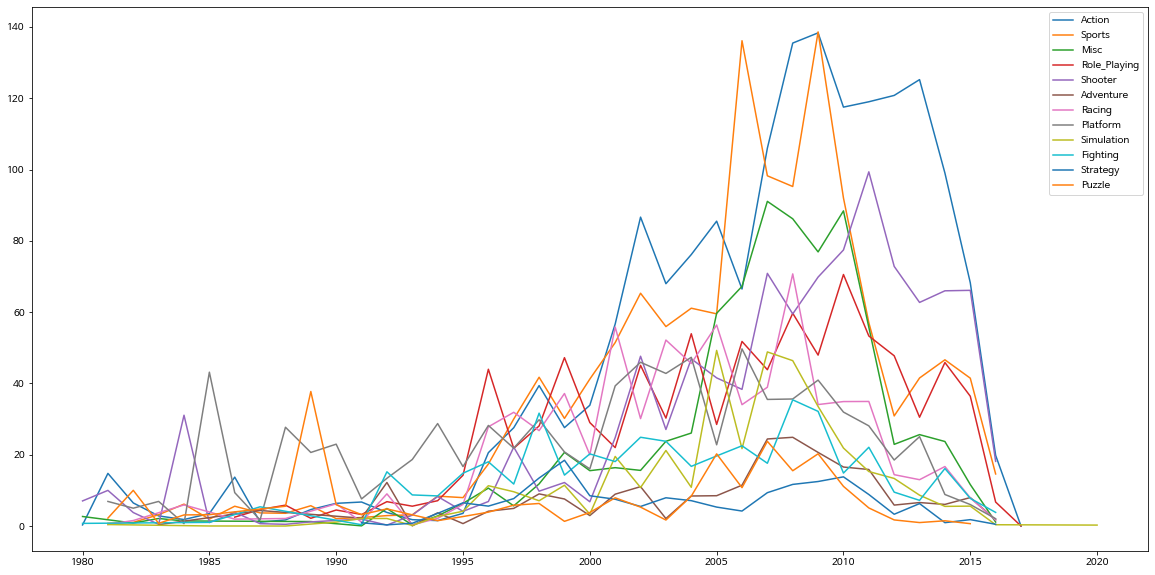

In [41]:
# 연도에 따른 장르별 게임 출고량(판매량)의 변화

plt.figure(figsize=(20,10))

Action_sales = data9[data9['Genre']=='Action'].groupby('Year').sum()
plt.plot(Action_sales.index, Action_sales['Total_Sales'], label ='Action')

Sports_sales = data9[data9['Genre']=='Sports'].groupby('Year').sum()
plt.plot(Sports_sales.index, Sports_sales['Total_Sales'], label ='Sports')

Misc_sales = data9[data9['Genre']=='Misc'].groupby('Year').sum()
plt.plot(Misc_sales.index, Misc_sales['Total_Sales'], label ='Misc')

Role_Playing_sales = data9[data9['Genre']=='Role-Playing'].groupby('Year').sum()
plt.plot(Role_Playing_sales.index, Role_Playing_sales['Total_Sales'], label ='Role_Playing')

Shooter_sales = data9[data9['Genre']=='Shooter'].groupby('Year').sum()
plt.plot(Shooter_sales.index, Shooter_sales['Total_Sales'], label ='Shooter')

Adventure_sales = data9[data9['Genre']=='Adventure'].groupby('Year').sum()
plt.plot(Adventure_sales.index, Adventure_sales['Total_Sales'], label ='Adventure')

Racing_sales = data9[data9['Genre']=='Racing'].groupby('Year').sum()
plt.plot(Racing_sales.index, Racing_sales['Total_Sales'], label ='Racing')

Platform_sales = data9[data9['Genre']=='Platform'].groupby('Year').sum()
plt.plot(Platform_sales.index, Platform_sales['Total_Sales'], label ='Platform')

Simulation_sales = data9[data9['Genre']=='Simulation'].groupby('Year').sum()
plt.plot(Simulation_sales.index, Simulation_sales['Total_Sales'], label ='Simulation')

Fighting_sales = data9[data9['Genre']=='Fighting'].groupby('Year').sum()
plt.plot(Fighting_sales.index, Fighting_sales['Total_Sales'], label ='Fighting')

Strategy_sales = data9[data9['Genre']=='Strategy'].groupby('Year').sum()
plt.plot(Strategy_sales.index, Strategy_sales['Total_Sales'], label ='Strategy')

Puzzle_sales = data9[data9['Genre']=='Puzzle'].groupby('Year').sum()
plt.plot(Puzzle_sales.index, Puzzle_sales['Total_Sales'], label ='Puzzle')

plt.legend()

# Q3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [42]:
# 네 지역에서의 출고량을 모두 합한 총 출고량 피처 생성
data['Total_Sales'] = data['NA_Sales'] + data['EU_Sales'] + data['JP_Sales'] + data['Other_Sales']

In [43]:
# 총 출고량(Total_Sales)이 높은 순서대로 정렬
new_data = data.sort_values('Total_Sales', ascending = False)
new_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


## 상위 n개의 데이터를 추출하여 Platform, 장르, Publisher별 파이플랏 그려서 특성 도출!

### 출고량이 **높은** 데이터 기준 정의

In [44]:
new_data['Total_Sales'].describe()

count    16241.000000
mean         0.539091
std          1.563905
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Total_Sales, dtype: float64

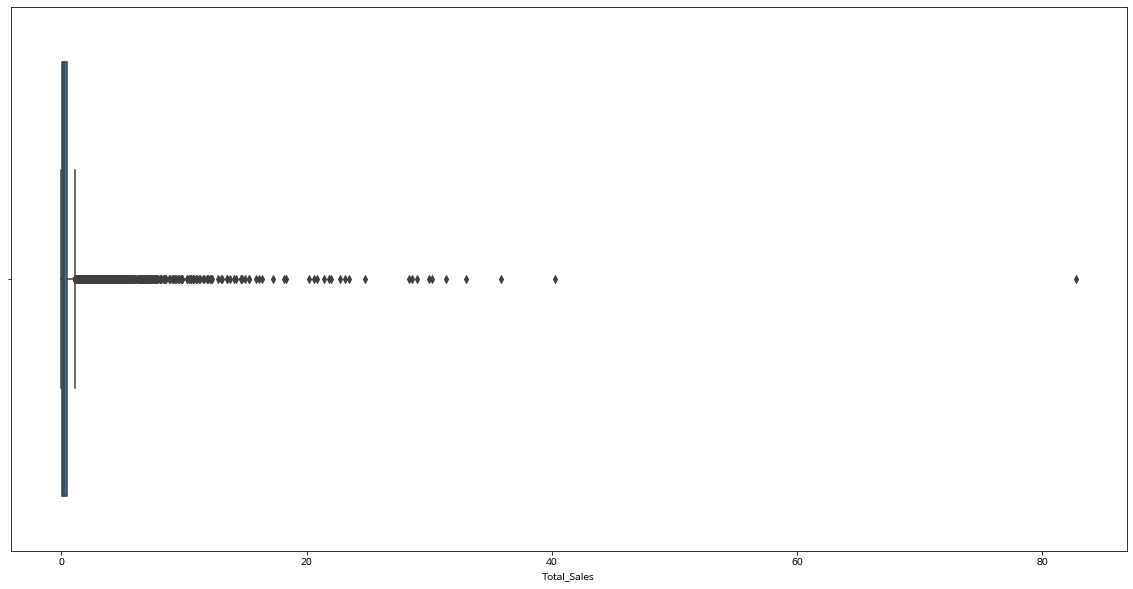

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "Total_Sales",  data = new_data)
plt.show()

- 데이터의 대부분이 0 근처에 몰려있어 '높음'의 판단 기준 불명확 -> 임의 지정

In [46]:
top_50 = new_data.head(50)
top_50

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


- 총 출고량이 10 이상인 데이터를 '높음'의 기준으로 잡고 top 50 데이터 선정

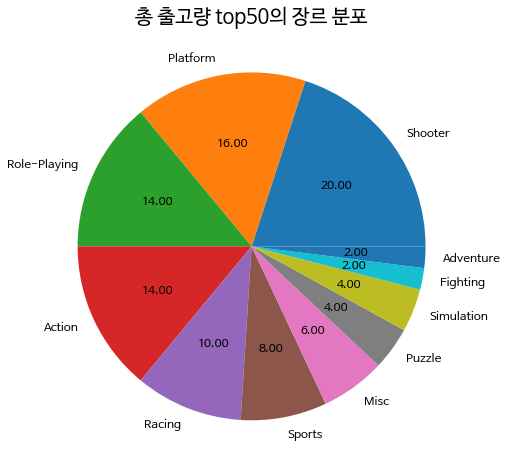

In [47]:
# 총 출고량 top50의 장르 분포

plt.figure(figsize=(8,8))
top50_genre = top_50['Genre'].value_counts()
plt.pie(top50_genre, autopct = '%.2f', labels=top50_genre.index, textprops={'size': 12})
plt.title("총 출고량 top50의 장르 분포", fontsize = 20)
plt.show()

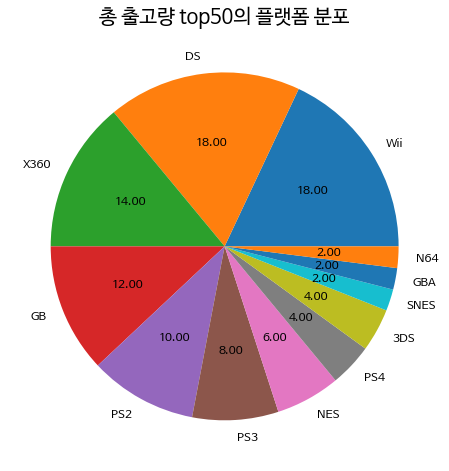

In [48]:
# 총 출고량 top50의 플랫폼 분포
plt.figure(figsize=(8,8))
top50_platform = top_50['Platform'].value_counts()
plt.pie(top50_platform, autopct = '%.2f', labels=top50_platform.index, textprops={'size': 12})
plt.title("총 출고량 top50의 플랫폼 분포", fontsize = 20)
plt.show()


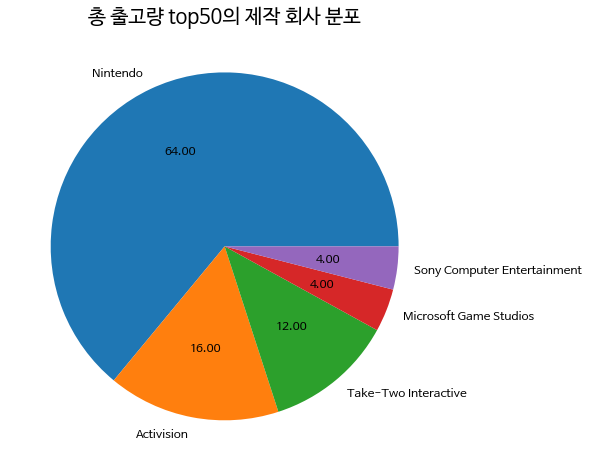

In [49]:
# 총 출고량 top50의 제작 회사 분포
plt.figure(figsize=(8,8))
top50_Publisher = top_50['Publisher'].value_counts()
plt.pie(top50_Publisher, autopct = '%.2f', labels=top50_Publisher.index, textprops={'size': 12})
plt.title("총 출고량 top50의 제작 회사 분포", fontsize = 20)
plt.show()

___

# 최종 결론
- 위와 같은 분석 결과를 토대로 다음의 결과가 도출되었다.
  - 장르 : Shooter , Action 
  - 제작 회사 : Nintendo
  - 플랫폼 : DS, Wii